In [1]:
import os
import sys
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from   astropy.table import Table

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot
from   findfile import findfile, fetch_fields

In [22]:
version = 'latest'
survey  = 'gama'
dryrun  = False
field   = 'G12'
prefix =  None

In [33]:
fields = fetch_fields(survey)

fpath = findfile(ftype='randoms_bd_ddp_n8', dryrun=dryrun, field=field, survey=survey, prefix=prefix, version=version)
fpath

'/cosma/home/durham/dc-moor2/data/v4/randoms/randoms_bd_ddp_n8_G12_0.fits'

In [34]:
rand = Table.read(fpath)

In [35]:
sorted(rand.dtype.names)

['BOUND_DIST',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'DDP',
 'DDP1_DELTA8',
 'DDP1_N8',
 'DDP2_DELTA8',
 'DDP2_N8',
 'DDP3_DELTA8',
 'DDP3_N8',
 'DDPKCORR_G0P0',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_R0P1',
 'DDPMALL_0P0',
 'DDPMALL_0P0_VISZ',
 'DDPZLIMS',
 'DEC',
 'DELTA_DETMAG_BRIGHT',
 'DELTA_DETMAG_FAINT',
 'DETMAG',
 'DISTMOD',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'FIELD',
 'FILLFACTOR',
 'FILLFACTOR_VMAX',
 'GMAG_DRED_SDSS',
 'GMR',
 'IMAG_DRED_SDSS',
 'KCORR_G0P0',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_R0P1',
 'LUMDIST',
 'MALL_0P0',
 'MCOLOR_0P0',
 'MQZERO_0P0',
 'NQ',
 'OBJID',
 'Q_COLOR_0P0',
 'RA',
 'RANDMATCH',
 'RANDSEP',
 'REST_GMR_0P0',
 'REST_GMR_0P1',
 'REST_GMR_0P1_INDEX',
 'REST_GMR_0P1_WARN',
 'RMAG_DRED_SDSS',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'R_PETRO',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'ZGAMA',
 'ZMAG_DRED_SDSS',
 'ZMAX',
 'ZMAX_WARN',
 'ZMIN',
 'ZMIN_WARN',
 'Z_THETA_QALL',
 'Z_THETA_QCOLOR']

In [8]:
rand = rand[rand['FILLFACTOR'] > 0.8]

In [10]:
rand['DDP1_DELTA8_ZEROPOINT'] = ((1 + rand['DDP1_N8']) / (rand.meta['VOL8'] * rand.meta['DDP1_DENS']) / rand['FILLFACTOR']) - 1.

Text(0, 0.5, '$\\delta_{8,DDP1, zero}$')

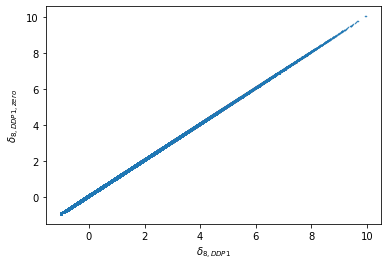

In [11]:
plt.scatter(rand['DDP1_DELTA8'], rand['DDP1_DELTA8_ZEROPOINT'], s=0.25)
plt.xlabel(r'$\delta_{8,DDP1}$')
plt.ylabel(r'$\delta_{8,DDP1, zero}$')

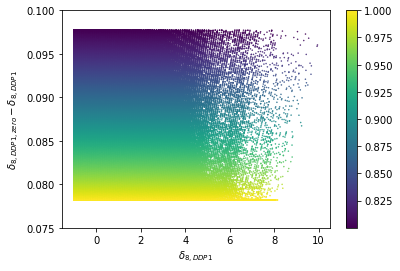

In [15]:
plt.scatter(rand['DDP1_DELTA8'], rand['DDP1_DELTA8_ZEROPOINT']-rand['DDP1_DELTA8'], c=rand['FILLFACTOR'], s=0.25)
plt.xlabel(r'$\delta_{8,DDP1}$')
plt.ylabel(r'$\delta_{8,DDP1, zero} - \delta_{8,DDP1}$')
plt.ylim(0.075, 0.1)
plt.colorbar()

In [ ]:
plt.hist(rand['FILLFACTOR'])